In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
dataset1 = pd.read_csv('/content/exp1 - Sheet1.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [42]:
dataset1.head()


,Input,Output
0,1,12
1,2,32
2,3,21
3,4,26
4,5,18


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [44]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [46]:
#Name:Parveen Sulthana J
#Register Number:212224040233
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        # Include your code here
        self.fc1=nn.Linear(1,8) #fc=fully connected,nn=neural network,1.input
        self.fc2=nn.Linear(8,10)#2.hidden layer
        self.fc3=nn.Linear(10,1)#3.output
        self.relu=nn.ReLU() #activation part,Rectified Linear Unit
        self.history={'loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x






In [47]:
# Initialize the Model, Loss Function, and Optimizer
# Write your code here
ai_brain=NeuralNet()#class name
criterion=nn.MSELoss()#Mean square
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)#learning rate,Root means quare

In [55]:
# Name:Parveen Sulthana J
# Register Number: 212224040233
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    # Write your code here
    for epoch in range(epochs):
      optimizer.zero_grad()
      loss=criterion(ai_brain(X_train),y_train)
      loss.backward()
      optimizer.step()
      ai_brain.history['loss'].append(loss.item())
      if epoch % 200 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [56]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 625.661560
Epoch [200/2000], Loss: 621.505371
Epoch [400/2000], Loss: 615.200928
Epoch [600/2000], Loss: 605.735474
Epoch [800/2000], Loss: 593.026489
Epoch [1000/2000], Loss: 576.866394
Epoch [1200/2000], Loss: 557.375610
Epoch [1400/2000], Loss: 534.806458
Epoch [1600/2000], Loss: 509.747498
Epoch [1800/2000], Loss: 482.664490


In [57]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 300.945068


In [58]:
loss_df = pd.DataFrame(ai_brain.history)

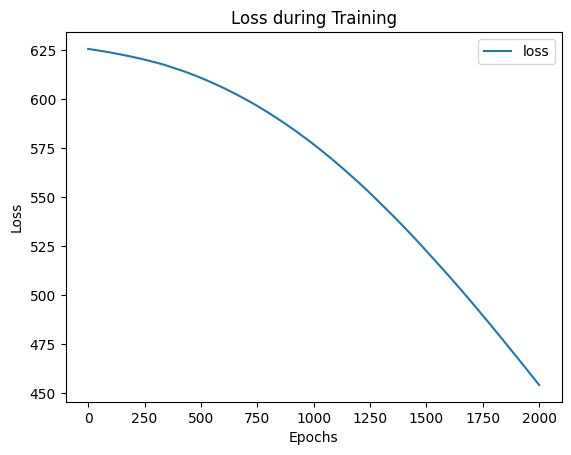

In [59]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [60]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 55.2081184387207
